# Perceptron Exercise

In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

We will use the famour iris data set

In [2]:
data_dic = sklearn.datasets.load_iris()
features = data_dic['data']
targets = data_dic['target']
c1 = features[targets==0]
c2 = features[targets==1]
c3 = features[targets==2]

This will show the data:

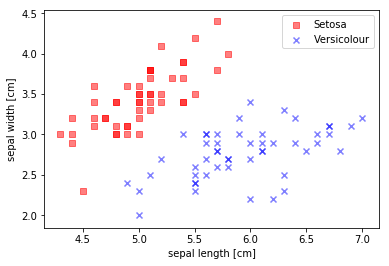

In [3]:
ind1, ind2 = 0,1
plt.scatter(c1[:,ind1],c1[:,ind2], color='red', marker='s', alpha=0.5, label="Setosa")
plt.scatter(c2[:,ind1],c2[:,ind2], color='blue', marker='x', alpha=0.5, label="Versicolour")
plt.legend()
plt.xlabel("sepal length [cm]")
plt.ylabel("sepal width [cm]");

This is used to get a smaller sample to play with

In [4]:
def subSample(nData):
    X = np.empty((2*nData,2))
    X[:nData] = c1[:nData,:2]
    X[nData:] = c2[:nData,:2]
    Y = np.empty(2*nData)
    Y[:nData] = np.ones(nData)
    Y[nData:] = -np.ones(nData)
    return X,Y

X, Y = subSample(5)

## Exercise

This is the decision function $\phi$:

In [5]:
def phi(x):
    if x<=0:
        return -1.0
    else:
        return 1.0
    
phi = np.vectorize(phi)

Implement the function to make a prediction for an input vector `x` and a weight vector `w`. 

In [6]:
def predictOne(x, w):
    tmp = 0
    tmp += w[0]
    for i in range(len(x)):
        tmp += w[i + 1] * x[i]
    return phi(tmp)
    # your function should return either -1. or 1.

In [7]:
assert predictOne(np.array([0.0,0.0]) , np.array([0.1,3.2,7.4])) == 1.0
assert predictOne(np.array([0.0,0.0]), np.array([-0.1,3.2,7.4])) == -1.0
assert predictOne(np.array([0.3,-0.7]), np.array([0.1,3.2,7.4])) == -1.0
assert predictOne(np.array([0.3,0.7]), np.array([0.1,3.2,7.4])) == 1.0

Implement the same function but with an array of values. `X` here will be a `n_d` x `n_f` array, where `n_d` is the number of data points and `n_f` is the number of input per data point.

In [8]:
def predictMany(X, w):
    result = []
    for x in X:
        result.append(predictOne(x, w))
    return np.array(result)
    # your function should return a list/array of n_d values -1 or 1

In [9]:
testX = np.array([
    [0.0, 0.0],
    [0.3,-0.7],
    [0.3,0.7]
])
assert all(abs(elem) == 1 for elem in predictMany(testX, [0.1,3.2,7.4])), 'Your array should only contain elements with absoulte value 1.'
assert (predictMany(testX, [0.1,3.2,7.4]) == np.array([1,-1,1])).all()

Implement the function that returns the updated weight vector according to the perceptron algorithm after running over the entire input data `X`, with labels `Y`, current weight vector `w` and learning rate `eta`. 

In [10]:
def update(X,Y,w,eta):
    neww = np.array(w)
    # YOUR CODE HERE
    for i in range(len(Y)):
        if predictOne(X[i], neww) != Y[i]:
            neww[0] += eta * Y[i]
            for j in range(len(w) - 1):
                neww[j + 1] += eta * Y[i] * X[i][j]
    return np.array(neww)

In [11]:
Xtest = np.array([(-1,),(-2,),(5,),(7,)])
Ytest = np.array([ -1, -1, 1, 1])
wtest = np.array([ 1.5 , 1.0])
assert (update(Xtest,Ytest,wtest,0.1) == np.array([1.4, 1.1])).all()

Define a function `fit` that updates the perceptron parameters until a solution is found and returns the number of steps needed to converge and the value of the weight vector.

In [22]:
def fit(X,Y,w0,eta):
    # YOUR CODE HERE
    # your function should return n_steps (as a number) and w (as an array)
    prediction = []
    w = w0
    n_steps = 0
    for x, y in zip(X,Y):
        prediction_i = predictOne(x, w)
        prediction.append(prediction_i)
    for i in range(100):
        while np.isclose(prediction, Y).all() == True:
            break
        else:
             for i in range(len(X)):
                x = X[i]
                y = Y[i]
                y_p = predictMany(x,neww)
                if y_p != y:

                    w[0] +=eta*y
                    w[1] +=eta*y*x
                    n_steps += 1
    w = np.array(w)
    return (n_steps,w)

In [215]:
def fit(X,Y,w0,eta):
    for i in range(100):
        record_w0 = w0.copy()
        w0 = update(X,Y,record_w0,eta)
        if (np.array(w0) == np.array(record_w0)).all():
            return i, np.array(w0)
    
    # YOUR CODE HERE
    # your function should return n_steps (as a number) and w (as an array)

    

In [23]:
Xtest = np.array([[5.1, 3.5], [4.9, 3. ], [4.7, 3.2], [4.6, 3.1], [5. , 3.6], [7. , 3.2], [6.4, 3.2], [6.9, 3.1],
       [5.5, 2.3], [6.5, 2.8]])
Ytest = np.array([ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.])

# these values already fit the data, so we should no do any step and return the original weight vector
test_n, test_w = fit(Xtest,Ytest,[0.2, -0.59, 0.92],0.1)
assert len(fit(Xtest,Ytest,[0.2, -0.59, 0.92],0.1)) == 2, 'Your function needs two return values'
assert isinstance(test_n, int), 'First return value should be an integer'
assert isinstance(test_w, (list, tuple, np.ndarray)), 'Second return value should be an array/list/tuple'

assert test_n == 0
assert (test_w == [ 0.2 , -0.59,  0.92]).all()

In [217]:
# this test requires some iterations
test_n, test_w = fit(Xtest,Ytest,[0.0, 0.0, 0.0],0.1)
assert test_n == 10
assert np.isclose(test_w , [ 0.2 , -0.59,  0.92]).all()

# Using scikit-learn

This is an example on how to use the perceptron implementation in scikit-learn. Use it to investigate things like 
- does it help to randomize the input
- what is the effect of changing eta? 

In [218]:
from sklearn.linear_model import Perceptron
# let's use a larger sample
X, Y = subSample(50)

This is uses the `Perceptron` class. Using the `max_iter=1` and `warm_start=True` options we ensure that each time the `fit` function is called only one step is performed. This will result in warning saying we have not converged, but that's ok, this is what we wanted.

In [ ]:
clf = Perceptron(
    max_iter=1 , 
    warm_start=True, 
    shuffle=False, 
    eta0=0.1)
for i in range(20):
    clf.fit(X, Y)
    print (clf.intercept_,clf.coef_)